## Simply AI agent 

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["PHI_API_KEY"] = os.getenv("PHI_API_KEY")
os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = os.getenv("LANGSMITH_TRACING")
os.environ["LANGSMITH_ENDPOINT"] = os.getenv("LANGSMITH_ENDPOINT")
os.environ["LANGSMITH_PROJECT"] = os.getenv("LANGSMITH_PROJECT")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [8]:
from tavily import TavilyClient
from typing import Literal
tavily_client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

def web_search(query: str, 
               num_results: int = 5, 
               topic: Literal["sports", "politics", "finance", "health"] = "sports",
               include_raw_content: bool = False) -> str:
    """Performs a web search using Tavily's web search API."""

    results = tavily_client.web.search(query=query, num_results=num_results, topic=topic, include_raw_content=include_raw_content)
    formatted_results = "\n".join([f"{i+1}. {result['title']}: {result['link']}" for i, result in enumerate(results)])
    return formatted_results

In [15]:
from langchain.chat_models import init_chat_model

model = init_chat_model("openai:gpt-4o", temperature=0)
model

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x00000272CE597FE0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000272CD9D3140>, root_client=<openai.OpenAI object at 0x00000272C956BBF0>, root_async_client=<openai.AsyncOpenAI object at 0x00000272CE5B85C0>, model_name='gpt-4o', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

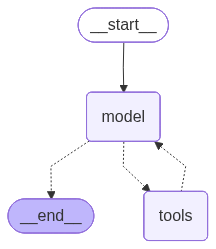

In [16]:
from langchain.agents import create_agent

simple_agent = create_agent(
    model=model,
    tools=[web_search]
)
simple_agent

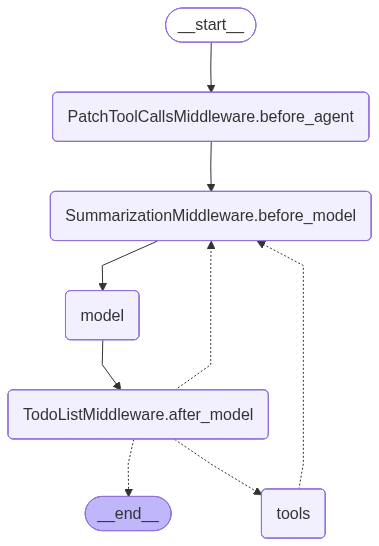

In [17]:
from deepagents import create_deep_agent

agent = create_deep_agent(
    model=model,
    tools=[web_search],
    system_prompt="Use the WebSearch tool to find information on the internet as needed."
)
agent

In [18]:
result = agent.invoke({"messages": [{"role": "user", "content": "Who won the FIFA World Cup 2022?"}]})
result

{'messages': [HumanMessage(content='Who won the FIFA World Cup 2022?', additional_kwargs={}, response_metadata={}, id='3c3135eb-e4c3-41cd-b447-482f89d65475'),
  AIMessage(content='Argentina won the FIFA World Cup 2022, defeating France in the final match. The game ended in a dramatic penalty shootout after a 3-3 draw in regulation and extra time.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 4461, 'total_tokens': 4501, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CwNG1pyen83VVUbg89Pa5Yi3R4Zsm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019ba6b5-546c-7b33-a16d-cce6a3231acc-0', tool_calls=[], invalid_tool

In [23]:
result["messages"][1]

AIMessage(content='Argentina won the FIFA World Cup 2022, defeating France in the final match. The game ended in a dramatic penalty shootout after a 3-3 draw in regulation and extra time.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 4461, 'total_tokens': 4501, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CwNG1pyen83VVUbg89Pa5Yi3R4Zsm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019ba6b5-546c-7b33-a16d-cce6a3231acc-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 4461, 'output_tokens': 40, 'total_tokens': 4501, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_d